In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
%matplotlib inline

In [220]:
path = "C:/Windows/Fonts/HYTBRB.TTF"
font_name = fm.FontProperties(fname=path,size=18).get_name()
print(font_name)
plt.rc('font',family=font_name)

HYtbrB


In [2]:
data = pd.read_csv("./desktop/data2.csv", sep=",")

In [3]:
data.head(3)

,PVN,BOR,ADMD,ANTC_ITEM_LCLS_CD,ANTC_ITEM_LCLS_NM,20190201,20190202,20190203,20190204,20190205,...,20200522,20200523,20200524,20200525,20200526,20200527,20200528,20200529,20200530,20200531
0,서울특별시,중구,소공동,10,식사,28.8%,30.4%,27.6%,35.6%,31.8%,...,26.8%,24.3%,32.8%,30.0%,24.8%,26.5%,25.1%,24.0%,23.0%,32.5%
1,서울특별시,중구,소공동,20,간식,18.6%,22.7%,22.5%,23.8%,26.9%,...,19.5%,22.9%,18.1%,17.4%,17.7%,20.0%,19.6%,22.5%,21.3%,19.2%
2,서울특별시,중구,소공동,30,마실거리,38.4%,34.5%,27.2%,30.8%,31.9%,...,39.5%,40.2%,35.4%,41.2%,37.8%,42.9%,42.2%,43.0%,43.0%,37.5%


In [4]:
data.isnull().sum()

PVN                  0
BOR                  0
ADMD                 0
ANTC_ITEM_LCLS_CD    0
ANTC_ITEM_LCLS_NM    0
                    ..
20200527             6
20200528             4
20200529             5
20200530             3
20200531             8
Length: 246, dtype: int64

In [5]:
data.fillna(0,inplace=True)

In [6]:
del data["ANTC_ITEM_LCLS_CD"]

In [7]:
data_1 = data.loc[list(range(0,480)),data.columns[:4]]

In [8]:
data_2 = data.loc[list(range(0,480)),data.columns[4:]]

In [9]:
data_1.columns = ["시코드","구코드","행정동코드","분석용상품대분류명"]

In [172]:
value = data_1[data_1.columns[3]].unique()

In [173]:
value

array(['식사', '간식', '마실거리', '홈&리빙', '헬스&뷰티', '취미&여가활동', '사회활동', '임신/육아'],
      dtype=object)

In [10]:
data_2 = data_2.apply(lambda x: x.str.replace("%",""), axis = 1)

In [11]:
data_2.fillna(0,inplace=True)

In [12]:
data_2.head()

,20190201,20190202,20190203,20190204,20190205,20190206,20190207,20190208,20190209,20190210,...,20200522,20200523,20200524,20200525,20200526,20200527,20200528,20200529,20200530,20200531
0,28.8,30.4,27.6,35.6,31.8,33.0,27.0,27.0,29.7,33.1,...,26.8,24.3,32.8,30.0,24.8,26.5,25.1,24.0,23.0,32.5
1,18.6,22.7,22.5,23.8,26.9,20.9,19.2,20.3,23.1,22.1,...,19.5,22.9,18.1,17.4,17.7,20.0,19.6,22.5,21.3,19.2
2,38.4,34.5,27.2,30.8,31.9,33.5,36.8,39.6,34.3,33.3,...,39.5,40.2,35.4,41.2,37.8,42.9,42.2,43.0,43.0,37.5
3,4.2,2.8,1.7,1.5,1.6,3.6,4.0,3.1,1.8,2.4,...,3.6,2.7,2.7,3.8,4.6,2.6,4.3,2.7,4.2,2.0
4,8.1,8.4,18.8,5.7,6.2,6.9,10.6,8.4,7.7,6.7,...,8.7,7.7,9.7,6.5,14.0,6.8,7.5,6.2,7.0,7.0


In [13]:
data_2.dtypes

20190201    object
20190202    object
20190203    object
20190204    object
20190205    object
             ...  
20200527    object
20200528    object
20200529    object
20200530    object
20200531    object
Length: 241, dtype: object

In [14]:
data_2 = data_2.apply(pd.to_numeric)

In [15]:
data = pd.concat([data_1,data_2],axis=1)

In [37]:
newdata = data.groupby(["시코드","구코드","분석용상품대분류명"])[data.columns[4:]].mean()
newdata

20190201   20190202   20190203   20190204   20190205  \
시코드   구코드 분석용상품대분류명                                                          
대구광역시 수성구 간식         19.765000  20.970000  20.905000  22.635000  23.665000   
          마실거리       32.295000  34.200000  32.980000  33.665000  36.940000   
          사회활동        0.990000   1.015000   0.790000   1.285000   1.510000   
          식사         36.875000  34.210000  33.045000  31.735000  26.865000   
          임신/육아       0.460000   0.560000   0.430000   0.595000   0.940000   
          취미&여가활동     0.440000   0.560000   0.575000   0.785000   0.895000   
          헬스&뷰티       5.620000   6.280000   9.265000   7.245000   7.325000   
          홈&리빙        3.555000   2.190000   2.000000   2.065000   1.865000   
      중구  간식         16.657143  18.657143  18.057143  19.071429  19.457143   
          마실거리       31.271429  34.600000  32.414286  35.442857  37.042857   
          사회활동        0.642857   1.057143   0.914286   1.585714   0.871429   
          식사         37.742857  35.414286  33.757143  32.057143  29.314286   
          임신/육아       0.228571   0.257143   0.357143   0.271429   0.428571   
          취미&여가활동     1.214286   0.500000   0.228571   0.771429   0.900000   
          헬스&뷰티       9.457143   7.071429  12.014286   8.314286   9.528571   
          홈&리빙        2.785714   2.442857   2.228571   2.500000   2.471429   
서울특별시 노원구 간식         23.611111  24.650000  24.700000  26.183333  29.111111   
          마실거리       32.461111  34.950000  30.872222  32.944444  34.566667   
          사회활동        0.816667   0.838889   0.705556   1.577778   1.072222   
          식사         33.716667  30.805556  32.283333  29.444444  25.127778   
          임신/육아       0.344444   0.361111   0.322222   0.472222   0.766667   
          취미&여가활동     0.633333   1.166667   0.838889   1.327778   1.094444   
          헬스&뷰티       5.422222   4.416667   7.950000   5.405556   5.927778   
          홈&리빙        3.027778   2.811111   2.316667   2.661111   2.355556   
      중구  간식         20.893333  24.020000  23.046667  24.773333  26.673333   
          마실거리       33.120000  34.066667  28.706667  31.340000  32.933333   
          사회활동        1.120000   1.320000   1.426667   1.446667   1.326667   
          식사         33.046667  30.413333  29.913333  31.306667  28.913333   
          임신/육아       0.240000   0.413333   0.306667   0.520000   0.640000   
          취미&여가활동     1.106667   0.646667   0.706667   1.013333   0.820000   
          헬스&뷰티       5.960000   5.993333  13.293333   6.553333   6.260000   
          홈&리빙        4.506667   3.126667   2.640000   3.040000   2.446667   

                      20190206   20190207   20190208   20190209   20190210  \
시코드   구코드 분석용상품대분류명                                                          
대구광역시 수성구 간식         19.930000  19.505000  20.730000  21.370000  20.915000   
          마실거리       36.265000  33.210000  33.325000  33.345000  33.610000   
          사회활동        1.155000   1.785000   0.970000   1.150000   0.995000   
          식사         33.620000  37.755000  37.035000  35.985000  36.505000   
          임신/육아       0.480000   0.290000   0.415000   0.430000   0.360000   
          취미&여가활동     0.745000   0.710000   0.615000   0.775000   0.470000   
          헬스&뷰티       5.960000   4.865000   4.625000   4.900000   4.955000   
          홈&리빙        1.845000   1.905000   2.310000   2.045000   2.180000   
      중구  간식         17.471429  18.042857  19.085714  20.228571  20.942857   
          마실거리       37.371429  35.142857  34.700000  34.042857  32.428571   
          사회활동        1.228571   1.357143   1.085714   1.000000   1.042857   
          식사         33.285714  35.300000  34.685714  35.157143  34.928571   
          임신/육아       0.457143   0.242857   0.285714   0.285714   0.314286   
          취미&여가활동     0.628571   0.585714   0.314286   0.371429   0.214286   
          헬스&뷰티       7.085714   6.585714   6.514286   6.214286   6.785714   
          홈&리빙        2.528571   2.771429  

In [20]:
newdataT = newdata.T
newdataT

시코드         대구광역시                                                      \
구코드           수성구                                                       
분석용상품대분류명      간식    마실거리   사회활동      식사  임신/육아 취미&여가활동  헬스&뷰티   홈&리빙   
20190201   19.765  32.295  0.990  36.875  0.460   0.440  5.620  3.555   
20190202   20.970  34.200  1.015  34.210  0.560   0.560  6.280  2.190   
20190203   20.905  32.980  0.790  33.045  0.430   0.575  9.265  2.000   
20190204   22.635  33.665  1.285  31.735  0.595   0.785  7.245  2.065   
20190205   23.665  36.940  1.510  26.865  0.940   0.895  7.325  1.865   
...           ...     ...    ...     ...    ...     ...    ...    ...   
20200527   19.845  40.060  0.650  30.215  0.495   0.425  5.600  2.715   
20200528   19.480  40.520  0.805  29.990  0.535   0.440  5.660  2.565   
20200529   20.810  39.160  1.010  29.175  0.535   0.460  5.730  3.160   
20200530   22.115  40.990  0.715  27.265  0.645   0.415  5.415  2.405   
20200531   22.905  40.470  0.900  26.760  0.670   0.385  5.400  2.500   

시코드                              ...     서울특별시                       \
구코드               중구             ...       노원구                   중구   
분석용상품대분류명         간식       마실거리  ...     헬스&뷰티      홈&리빙         간식   
20190201   16.657143  31.271429  ...  5.422222  3.027778  20.893333   
20190202   18.657143  34.600000  ...  4.416667  2.811111  24.020000   
20190203   18.057143  32.414286  ...  7.950000  2.316667  23.046667   
20190204   19.071429  35.442857  ...  5.405556  2.661111  24.773333   
20190205   19.457143  37.042857  ...  5.927778  2.355556  26.673333   
...              ...        ...  ...       ...       ...        ...   
20200527   16.728571  39.400000  ...  4.655556  2.511111  20.380000   
20200528   17.571429  38.400000  ...  4.983333  3.222222  20.773333   
20200529   19.671429  40.528571  ...  4.583333  2.866667  21.746667   
20200530   19.385714  39.300000  ...  4.927778  2.650000  22.580000   
20200531   19.757143  37.942857  ...  5.333333  2.861111  21.593333   

시코드                                                                       \
구코드                                                                        
분석용상품대분류명       마실거리      사회활동         식사     임신/육아   취미&여가활동      헬스&뷰티   
20190201   33.120000  1.120000  33.046667  0.240000  1.106667   5.960000   
20190202   34.066667  1.320000  30.413333  0.413333  0.646667   5.993333   
20190203   28.706667  1.426667  29.913333  0.306667  0.706667  13.293333   
20190204   31.340000  1.446667  31.306667  0.520000  1.013333   6.553333   
20190205   32.933333  1.326667  28.913333  0.640000  0.820000   6.260000   
...              ...       ...        ...       ...       ...        ...   
20200527   38.440000  0.833333  29.173333  0.513333  0.520000   6.246667   
20200528   38.060000  0.880000  29.033333  0.393333  0.620000   6.200000   
20200529   39.200000  0.726667  27.940000  0.340000  0.940000   5.953333   
20200530   39.860000  0.880000  25.400000  0.480000  0.633333   6.500000   
20200531   37.306667  1.033333  28.406667  0.606667  0.506667   6.906667   

시코드                  
구코드                  
분석용상품대분류명      홈&리빙  
20190201   4.506667  
20190202   3.126667  
20190203   2.640000  
20190204   3.040000  
20190205   2.446667  
...             ...  
20200527   3.913333  
20200528   4.040000  
20200529   3.153333  
20200530   3.673333  
20200531   3.633333  

[241 rows x 32 columns]

In [21]:
newdataT_2019 = newdataT.iloc[:120,:32]

In [22]:
newdataT_2020 = newdataT.iloc[120:,:32]

In [23]:
newdataT_2020.drop("20200229",inplace=True)

In [47]:
data_2019_02 = newdataT_2019[:28].mean()
data_2020_02 = newdataT_2020[:28].mean()
data_2019_03 = newdataT_2019[28:59].mean()
data_2020_03 = newdataT_2020[28:59].mean()
data_2019_04 = newdataT_2019[59:89].mean()
data_2020_04 = newdataT_2020[59:89].mean()
data_2019_05 = newdataT_2019[89:120].mean()
data_2020_05 = newdataT_2020[89:120].mean()

In [219]:
data_2019_02

시코드    구코드  분석용상품대분류명
대구광역시  수성구  간식           21.565000
            마실거리         33.371429
            사회활동          0.998571
            식사           35.820714
            임신/육아         0.449643
            취미&여가활동       0.580714
            헬스&뷰티         5.091071
            홈&리빙          2.122143
       중구   간식           19.769388
            마실거리         33.897449
            사회활동          0.977551
            식사           34.741837
            임신/육아         0.311224
            취미&여가활동       0.470918
            헬스&뷰티         7.007143
            홈&리빙          2.827041
서울특별시  노원구  간식           24.815278
            마실거리         33.694048
            사회활동          0.843452
            식사           32.508532
            임신/육아         0.413889
            취미&여가활동       0.690476
            헬스&뷰티         4.377381
            홈&리빙          2.660119
       중구   간식           23.184286
            마실거리         33.408571
            사회활동          1.226190
            식사           31.38452

In [54]:
data_2019_02.unstack()
data_2020_02.unstack()
data_2019_03.unstack()
data_2020_03.unstack()
data_2019_04.unstack()
data_2020_04.unstack()
data_2019_05.unstack()
data_2020_05.unstack()

분석용상품대분류명         간식       마실거리      사회활동         식사     임신/육아   취미&여가활동  \
시코드   구코드                                                                  
대구광역시 수성구  21.006935  38.515161  0.808387  29.807903  0.599194  0.770000   
      중구   19.075115  37.502304  0.880184  29.986636  0.279724  0.470968   
서울특별시 노원구  22.315233  37.264695  0.639964  30.194444  0.547312  0.737993   
      중구   20.971398  37.260860  0.876344  29.057419  0.518710  0.579140   

분석용상품대분류명     헬스&뷰티      홈&리빙  
시코드   구코드                      
대구광역시 수성구  5.722258  2.771290  
      중구   7.469124  4.319355  
서울특별시 노원구  5.317921  2.977957  
      중구   7.035484  3.701935

In [62]:
data_2019_02.unstack()

분석용상품대분류명         간식       마실거리      사회활동         식사     임신/육아   취미&여가활동  \
시코드   구코드                                                                  
대구광역시 수성구  21.565000  33.371429  0.998571  35.820714  0.449643  0.580714   
      중구   19.769388  33.897449  0.977551  34.741837  0.311224  0.470918   
서울특별시 노원구  24.815278  33.694048  0.843452  32.508532  0.413889  0.690476   
      중구   23.184286  33.408571  1.226190  31.384524  0.363810  0.601905   

분석용상품대분류명     헬스&뷰티      홈&리빙  
시코드   구코드                      
대구광역시 수성구  5.091071  2.122143  
      중구   7.007143  2.827041  
서울특별시 노원구  4.377381  2.660119  
      중구   6.301667  3.531667

In [102]:
monthdata = pd.concat([data_2019_02, data_2019_03, data_2019_04, data_2019_05, data_2020_02, data_2020_03, data_2020_04, data_2020_05],axis=1)
monthdata

0          1          2          3          4  \
시코드   구코드 분석용상품대분류명                                                          
대구광역시 수성구 간식         21.565000  21.789677  19.900333  19.150323  22.836786   
          마실거리       33.371429  33.913548  36.507500  39.536129  30.992500   
          사회활동        0.998571   0.883226   0.850167   0.825000   0.759821   
          식사         35.820714  35.015806  34.602667  32.238387  31.956429   
          임신/육아       0.449643   0.534032   0.491667   0.690806   0.411786   
          취미&여가활동     0.580714   0.520323   0.535167   0.900484   0.388036   
          헬스&뷰티       5.091071   5.212258   4.955500   4.474677  10.119107   
          홈&리빙        2.122143   2.132097   2.157667   2.188065   2.532321   
      중구  간식         19.769388  19.599078  17.770952  16.826728  20.551020   
          마실거리       33.897449  34.290783  36.336190  40.274654  29.417347   
          사회활동        0.977551   0.995853   0.917143   0.883410   0.754082   
          식사         34.741837  34.383871  34.811905  32.282028  33.210714   
          임신/육아       0.311224   0.348387   0.253810   0.258525   0.173980   
          취미&여가활동     0.470918   0.449770   0.513810   0.558986   0.396429   
          헬스&뷰티       7.007143   7.176959   6.518095   5.902304  11.981122   
          홈&리빙        2.827041   2.756682   2.882857   3.004147   3.519388   
서울특별시 노원구 간식         24.815278  24.455914  22.520185  21.126523  25.659921   
          마실거리       33.694048  34.005556  36.816667  40.119534  31.585119   
          사회활동        0.843452   0.785305   0.714815   0.705556   0.651587   
          식사         32.508532  32.032079  31.946296  30.128674  31.136706   
          임신/육아       0.413889   0.408602   0.483333   0.559498   0.415278   
          취미&여가활동     0.690476   0.616129   0.605926   0.900896   0.488690   
          헬스&뷰티       4.377381   5.223297   4.513704   3.952151   7.316468   
          홈&리빙        2.660119   2.477240   2.397593   2.505376   2.752976   
      중구  간식         23.184286  23.208387  21.958667  20.908602  22.617381   
          마실거리       33.408571  33.458495  35.481111  38.780215  31.025714   
          사회활동        1.226190   1.271613   1.228667   1.122796   0.978571   
          식사         31.384524  30.812903  30.536222  29.067957  30.157619   
          임신/육아       0.363810   0.372043   0.382222   0.442796   0.323095   
          취미&여가활동     0.601905   0.565591   0.560444   0.566882   0.431190   
          헬스&뷰티       6.301667   6.979570   6.578000   5.848387  11.119524   
          홈&리빙        3.531667   3.341075   3.273778   3.260000   3.346429   

                             5          6          7  
시코드   구코드 분석용상품대분류명                                   
대구광역시 수성구 간식         24.613387  22.181500  21.006935  
          마실거리       33.292097  36.881667  38.515161  
          사회활동        0.697419   0.657667   0.808387  
          식사         31.890484  31.552167  29.807903  
          임신/육아       0.499677   0.534000   0.599194  
          취미&여가활동     0.459032   0.444667   0.770000  
          헬스&뷰티       5.969355   5.151000   5.722258  
          홈&리빙        2.578065   2.590667   2.771290  
      중구  간식         21.217972  19.629524  19.075115  
          마실거리       31.625806  35.226667  37.502304  
          사회활동        0.752995   0.781905   0.880184  
          식사         34.812442  32.751905  29.986636  
          임신/육아       0.359908   0.356190   0.279724  
          취미&여가활동     0.432719   0.463810   0.470968  
          헬스&뷰티       6.842396   6.698095   7.469124  
          홈&리빙        3.951613   4.085714   4.319355  
서울특별시 노원구 간식         26.515771  23.472037  22.315233  
          마실거리       33.309140  35.553333  37.264695  
          사회활동        0.578674   0.575185   0.639964  
          식사         31.435842  32.045556  30.194444  
          임신/육아       0.502688   0.550370   0.547312  
          취미&여가활동     0.506989   0.497963   0.737993  
          헬스&뷰티       4.490681   4.639630   5.317921  
 

In [103]:
monthdata.columns = ["201902","201903","201904","201905","202002","202003","202004","202005"]

In [104]:
monthdata

201902     201903     201904     201905     202002  \
시코드   구코드 분석용상품대분류명                                                          
대구광역시 수성구 간식         21.565000  21.789677  19.900333  19.150323  22.836786   
          마실거리       33.371429  33.913548  36.507500  39.536129  30.992500   
          사회활동        0.998571   0.883226   0.850167   0.825000   0.759821   
          식사         35.820714  35.015806  34.602667  32.238387  31.956429   
          임신/육아       0.449643   0.534032   0.491667   0.690806   0.411786   
          취미&여가활동     0.580714   0.520323   0.535167   0.900484   0.388036   
          헬스&뷰티       5.091071   5.212258   4.955500   4.474677  10.119107   
          홈&리빙        2.122143   2.132097   2.157667   2.188065   2.532321   
      중구  간식         19.769388  19.599078  17.770952  16.826728  20.551020   
          마실거리       33.897449  34.290783  36.336190  40.274654  29.417347   
          사회활동        0.977551   0.995853   0.917143   0.883410   0.754082   
          식사         34.741837  34.383871  34.811905  32.282028  33.210714   
          임신/육아       0.311224   0.348387   0.253810   0.258525   0.173980   
          취미&여가활동     0.470918   0.449770   0.513810   0.558986   0.396429   
          헬스&뷰티       7.007143   7.176959   6.518095   5.902304  11.981122   
          홈&리빙        2.827041   2.756682   2.882857   3.004147   3.519388   
서울특별시 노원구 간식         24.815278  24.455914  22.520185  21.126523  25.659921   
          마실거리       33.694048  34.005556  36.816667  40.119534  31.585119   
          사회활동        0.843452   0.785305   0.714815   0.705556   0.651587   
          식사         32.508532  32.032079  31.946296  30.128674  31.136706   
          임신/육아       0.413889   0.408602   0.483333   0.559498   0.415278   
          취미&여가활동     0.690476   0.616129   0.605926   0.900896   0.488690   
          헬스&뷰티       4.377381   5.223297   4.513704   3.952151   7.316468   
          홈&리빙        2.660119   2.477240   2.397593   2.505376   2.752976   
      중구  간식         23.184286  23.208387  21.958667  20.908602  22.617381   
          마실거리       33.408571  33.458495  35.481111  38.780215  31.025714   
          사회활동        1.226190   1.271613   1.228667   1.122796   0.978571   
          식사         31.384524  30.812903  30.536222  29.067957  30.157619   
          임신/육아       0.363810   0.372043   0.382222   0.442796   0.323095   
          취미&여가활동     0.601905   0.565591   0.560444   0.566882   0.431190   
          헬스&뷰티       6.301667   6.979570   6.578000   5.848387  11.119524   
          홈&리빙        3.531667   3.341075   3.273778   3.260000   3.346429   

                        202003     202004     202005  
시코드   구코드 분석용상품대분류명                                   
대구광역시 수성구 간식         24.613387  22.181500  21.006935  
          마실거리       33.292097  36.881667  38.515161  
          사회활동        0.697419   0.657667   0.808387  
          식사         31.890484  31.552167  29.807903  
          임신/육아       0.499677   0.534000   0.599194  
          취미&여가활동     0.459032   0.444667   0.770000  
          헬스&뷰티       5.969355   5.151000   5.722258  
          홈&리빙        2.578065   2.590667   2.771290  
      중구  간식         21.217972  19.629524  19.075115  
          마실거리       31.625806  35.226667  37.502304  
          사회활동        0.752995   0.781905   0.880184  
          식사         34.812442  32.751905  29.986636  
          임신/육아       0.359908   0.356190   0.279724  
          취미&여가활동     0.432719   0.463810   0.470968  
          헬스&뷰티       6.842396   6.698095   7.469124  
          홈&리빙        3.951613   4.085714   4.319355  
서울특별시 노원구 간식         26.515771  23.472037  22.315233  
          마실거리       33.309140  35.553333  37.264695  
          사회활동        0.578674   0.575185   0.639964  
          식사         31.435842  32.045556  30.194444  
          임신/육아       0.502688   0.550370   0.547312  
          취미&여가활동     0.506989   0.497963   0.737993  
          헬스&뷰티       4.490681   4.639630   5.31792

In [113]:
data_2019 = monthdata.iloc[:32,:4]
data_2019.head(3)

201902     201903     201904     201905
시코드   구코드 분석용상품대분류명                                            
대구광역시 수성구 간식         21.565000  21.789677  19.900333  19.150323
          마실거리       33.371429  33.913548  36.507500  39.536129
          사회활동        0.998571   0.883226   0.850167   0.825000

In [114]:
data_2020 = monthdata.iloc[:32,4:]
data_2020.head(3)

202002     202003     202004     202005
시코드   구코드 분석용상품대분류명                                            
대구광역시 수성구 간식         22.836786  24.613387  22.181500  21.006935
          마실거리       30.992500  33.292097  36.881667  38.515161
          사회활동        0.759821   0.697419   0.657667   0.808387

In [112]:
data_2019T = data_2019.T
data_2019T

시코드            대구광역시                                                      \
구코드              수성구                                                       
분석용상품대분류명         간식       마실거리      사회활동         식사     임신/육아   취미&여가활동   
201902     21.565000  33.371429  0.998571  35.820714  0.449643  0.580714   
201903     21.789677  33.913548  0.883226  35.015806  0.534032  0.520323   
201904     19.900333  36.507500  0.850167  34.602667  0.491667  0.535167   
201905     19.150323  39.536129  0.825000  32.238387  0.690806  0.900484   

시코드                                                  ...     서울특별시            \
구코드                                   중구             ...       노원구             
분석용상품대분류명     헬스&뷰티      홈&리빙         간식       마실거리  ...     헬스&뷰티      홈&리빙   
201902     5.091071  2.122143  19.769388  33.897449  ...  4.377381  2.660119   
201903     5.212258  2.132097  19.599078  34.290783  ...  5.223297  2.477240   
201904     4.955500  2.157667  17.770952  36.336190  ...  4.513704  2.397593   
201905     4.474677  2.188065  16.826728  40.274654  ...  3.952151  2.505376   

시코드                                                                       \
구코드               중구                                                       
분석용상품대분류명         간식       마실거리      사회활동         식사     임신/육아   취미&여가활동   
201902     23.184286  33.408571  1.226190  31.384524  0.363810  0.601905   
201903     23.208387  33.458495  1.271613  30.812903  0.372043  0.565591   
201904     21.958667  35.481111  1.228667  30.536222  0.382222  0.560444   
201905     20.908602  38.780215  1.122796  29.067957  0.442796  0.566882   

시코드                            
구코드                            
분석용상품대분류명     헬스&뷰티      홈&리빙  
201902     6.301667  3.531667  
201903     6.979570  3.341075  
201904     6.578000  3.273778  
201905     5.848387  3.260000  

[4 rows x 32 columns]

In [115]:
data_2020T = data_2020.T
data_2020T

시코드            대구광역시                                                      \
구코드              수성구                                                       
분석용상품대분류명         간식       마실거리      사회활동         식사     임신/육아   취미&여가활동   
202002     22.836786  30.992500  0.759821  31.956429  0.411786  0.388036   
202003     24.613387  33.292097  0.697419  31.890484  0.499677  0.459032   
202004     22.181500  36.881667  0.657667  31.552167  0.534000  0.444667   
202005     21.006935  38.515161  0.808387  29.807903  0.599194  0.770000   

시코드                                                   ...     서울특별시            \
구코드                                    중구             ...       노원구             
분석용상품대분류명      헬스&뷰티      홈&리빙         간식       마실거리  ...     헬스&뷰티      홈&리빙   
202002     10.119107  2.532321  20.551020  29.417347  ...  7.316468  2.752976   
202003      5.969355  2.578065  21.217972  31.625806  ...  4.490681  2.656272   
202004      5.151000  2.590667  19.629524  35.226667  ...  4.639630  2.664630   
202005      5.722258  2.771290  19.075115  37.502304  ...  5.317921  2.977957   

시코드                                                                       \
구코드               중구                                                       
분석용상품대분류명         간식       마실거리      사회활동         식사     임신/육아   취미&여가활동   
202002     22.617381  31.025714  0.978571  30.157619  0.323095  0.431190   
202003     23.230753  33.638710  0.769462  31.755054  0.367312  0.479140   
202004     21.385778  35.961556  0.782000  30.778222  0.739111  0.446222   
202005     20.971398  37.260860  0.876344  29.057419  0.518710  0.579140   

시코드                             
구코드                             
분석용상품대분류명      헬스&뷰티      홈&리빙  
202002     11.119524  3.346429  
202003      6.107527  3.652473  
202004      6.265333  3.640667  
202005      7.035484  3.701935  

[4 rows x 32 columns]

In [148]:
data_2020T[data_2020T.columns[0]]

202002    22.836786
202003    24.613387
202004    22.181500
202005    21.006935
Name: (대구광역시, 수성구, 간식), dtype: float64

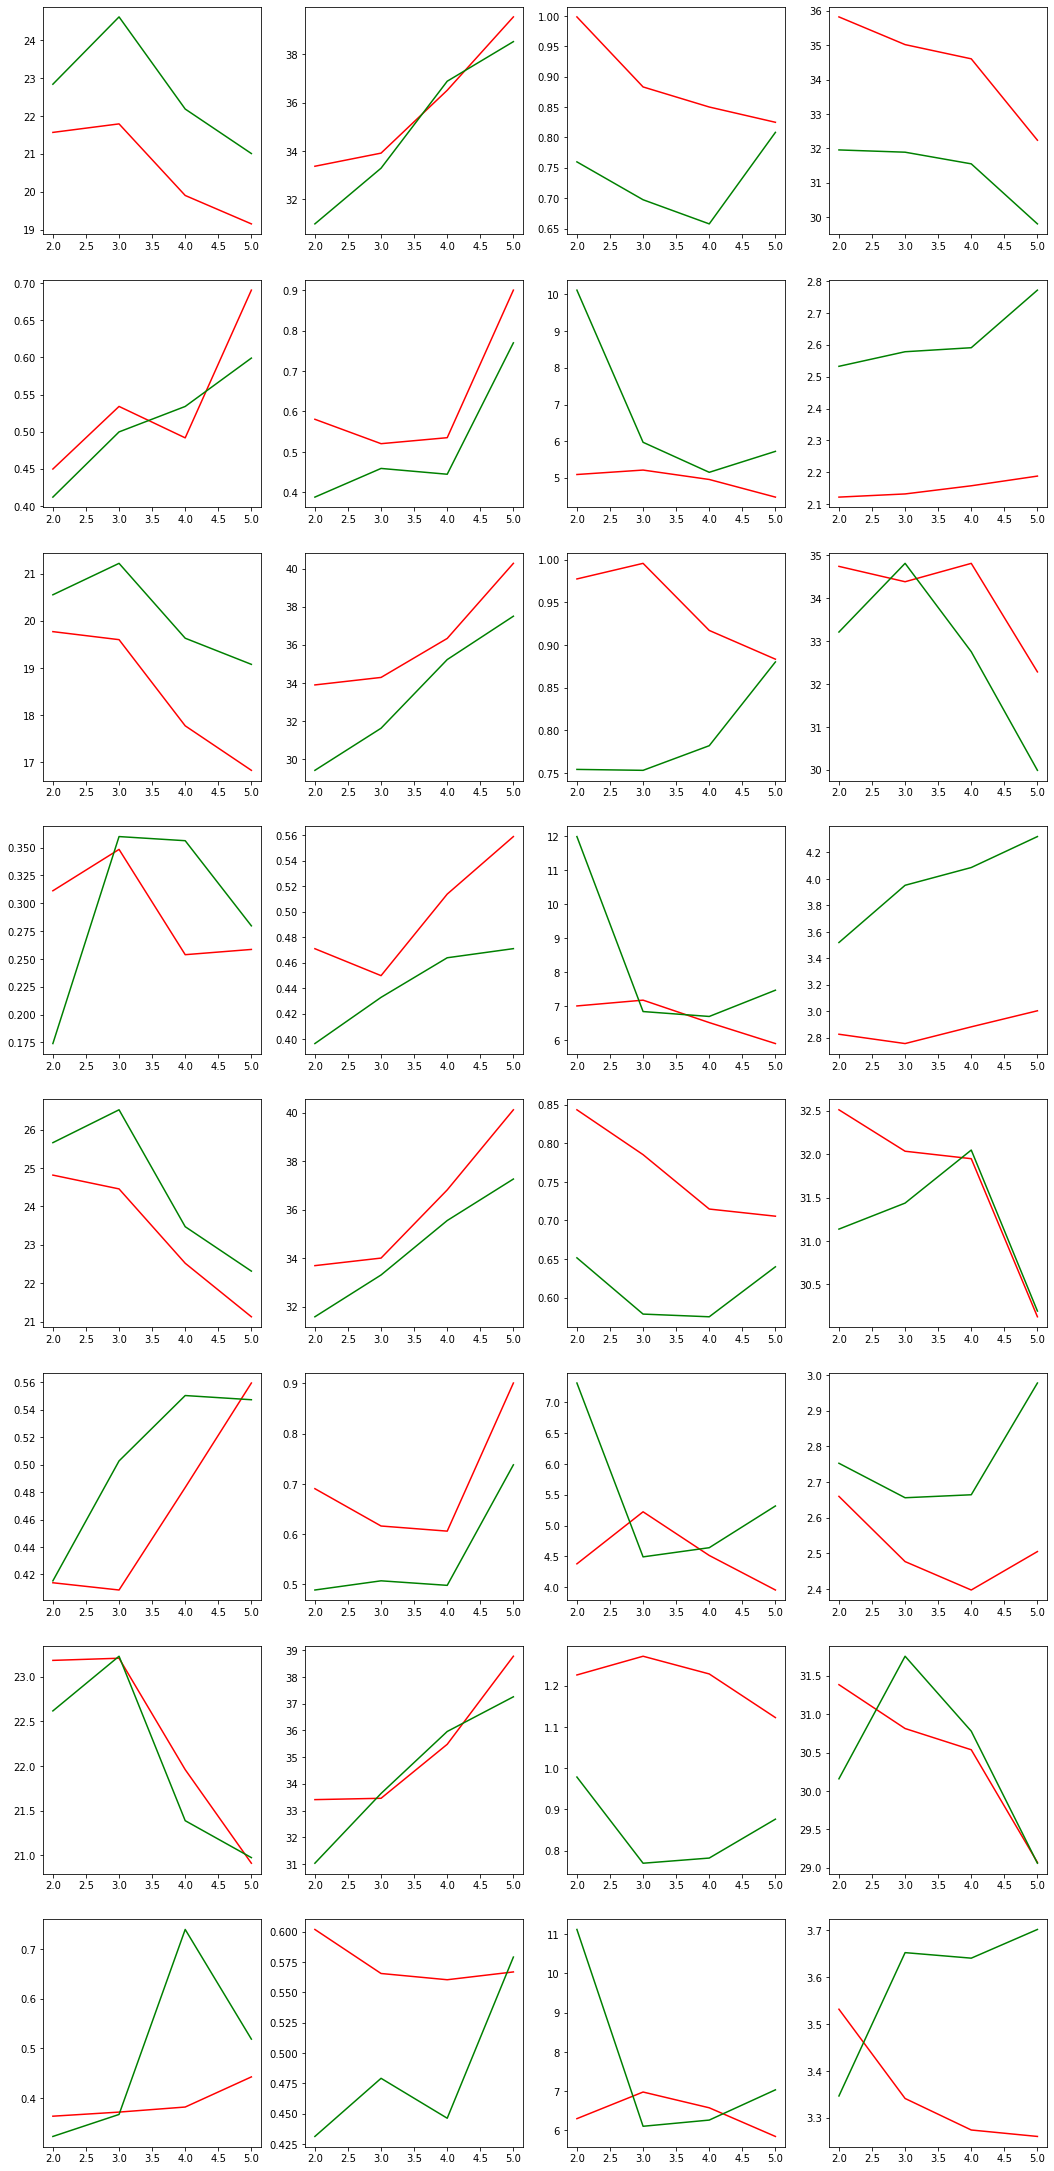

In [161]:
fig = plt.figure(figsize=(18,160))
for i in range(0,32):
    plt.subplot(32,4,i+1)
    plt.plot(range(2,6),data_2019T[data_2019T.columns[i]],'r',range(2,6),data_2020T[data_2020T.columns[i]],'g')

In [167]:
data_2019T.columns.

MultiIndex([('대구광역시', '수성구',      '간식'),
            ('대구광역시', '수성구',    '마실거리'),
            ('대구광역시', '수성구',    '사회활동'),
            ('대구광역시', '수성구',      '식사'),
            ('대구광역시', '수성구',   '임신/육아'),
            ('대구광역시', '수성구', '취미&여가활동'),
            ('대구광역시', '수성구',   '헬스&뷰티'),
            ('대구광역시', '수성구',    '홈&리빙'),
            ('대구광역시',  '중구',      '간식'),
            ('대구광역시',  '중구',    '마실거리'),
            ('대구광역시',  '중구',    '사회활동'),
            ('대구광역시',  '중구',      '식사'),
            ('대구광역시',  '중구',   '임신/육아'),
            ('대구광역시',  '중구', '취미&여가활동'),
            ('대구광역시',  '중구',   '헬스&뷰티'),
            ('대구광역시',  '중구',    '홈&리빙'),
            ('서울특별시', '노원구',      '간식'),
            ('서울특별시', '노원구',    '마실거리'),
            ('서울특별시', '노원구',    '사회활동'),
            ('서울특별시', '노원구',      '식사'),
            ('서울특별시', '노원구',   '임신/육아'),
            ('서울특별시', '노원구', '취미&여가활동'),
            ('서울특별시', '노원구',   '헬스&뷰티'),
            ('서울특별시', '노원구',    '홈&리빙'),
            ('서울

In [188]:
value

array(['식사', '간식', '마실거리', '홈&리빙', '헬스&뷰티', '취미&여가활동', '사회활동', '임신/육아'],
      dtype=object)

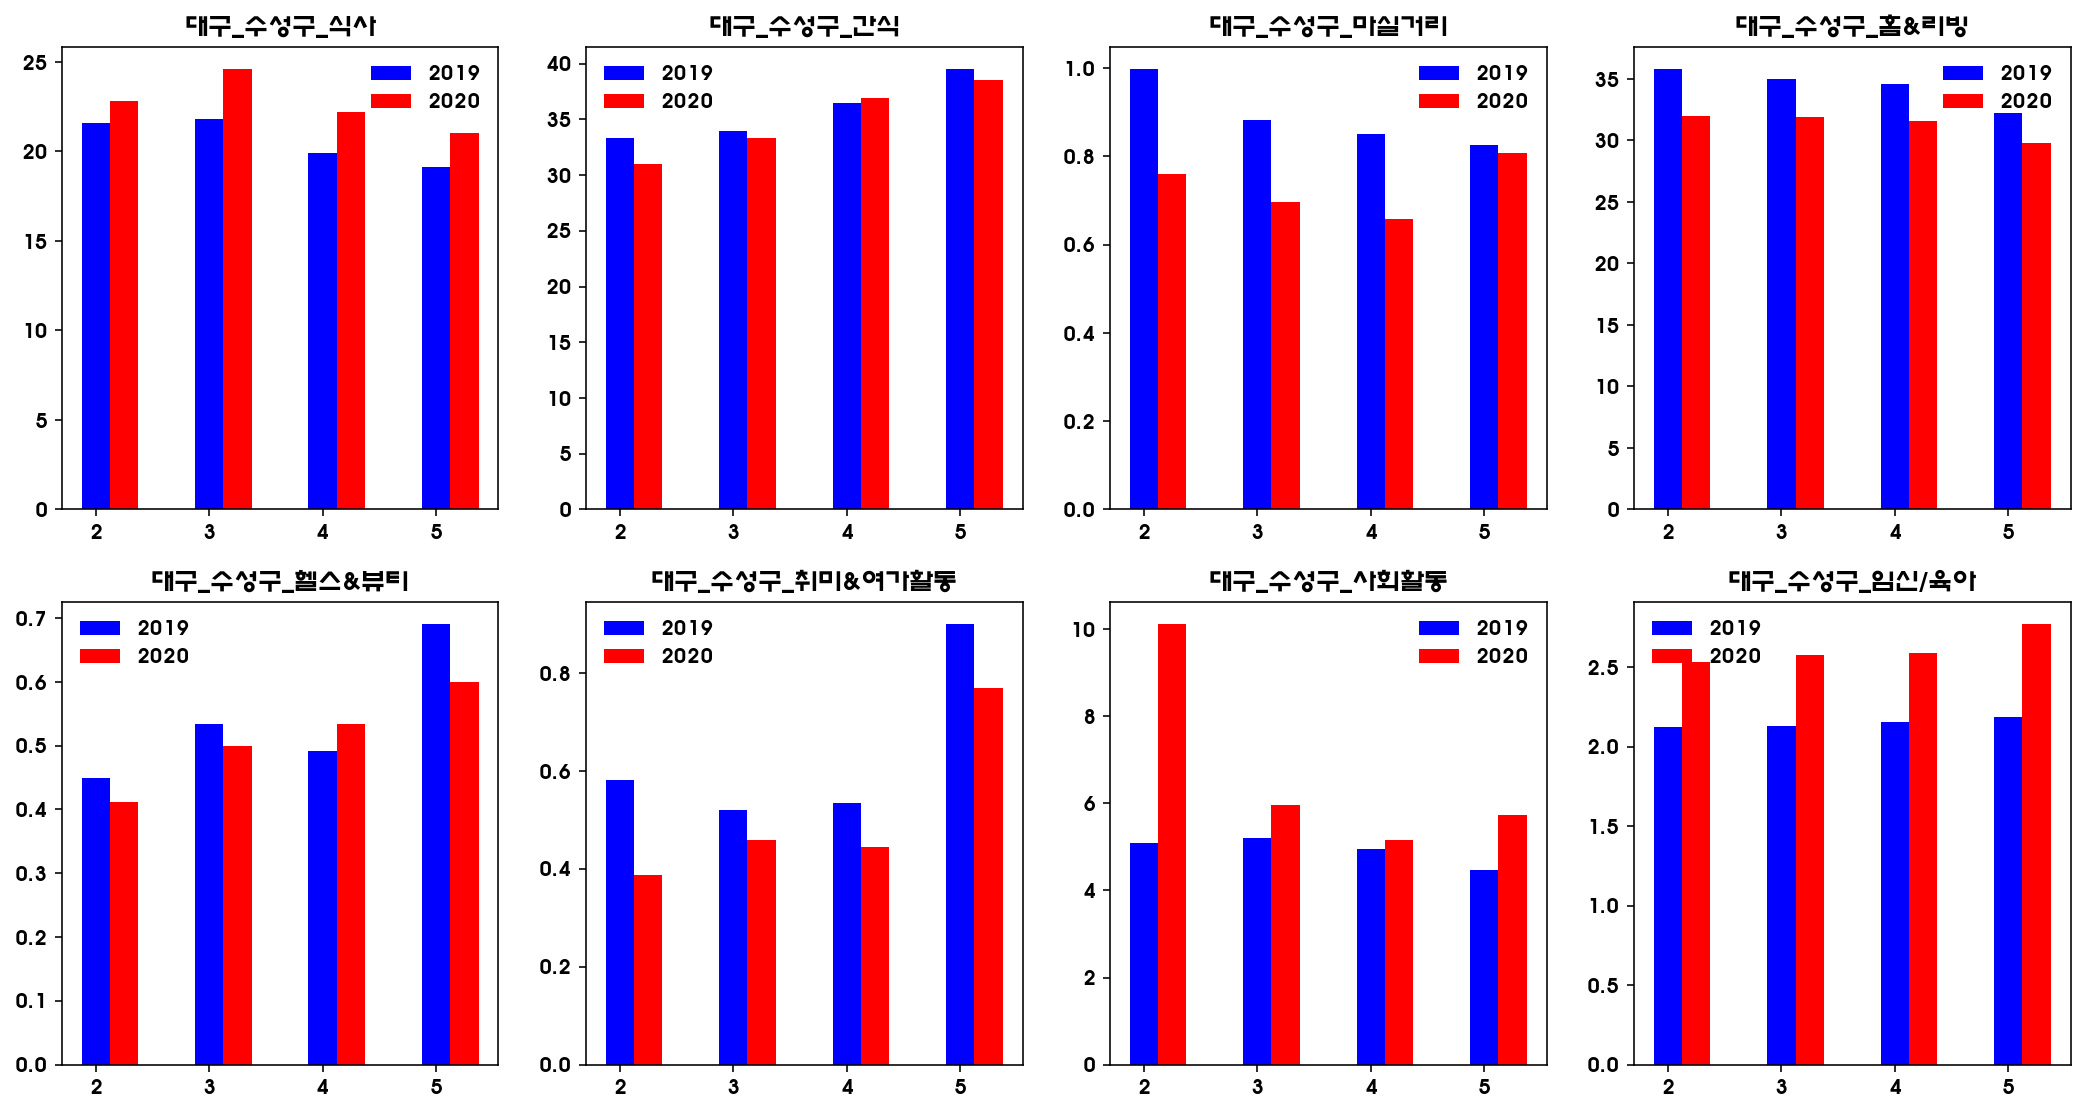

In [211]:
X = np.arange(4)
fig = plt.figure(figsize = (18,40))
for i in range(0,8):
    plt.subplot(8,4,i+1)
    plt.bar(X+2.00, list(data_2019T[data_2019T.columns[i]]), label='2019',color = 'b', width = 0.25)
    plt.bar(X+2.25, list(data_2020T[data_2020T.columns[i]]), label='2020',color = 'r', width = 0.25)
    plt.legend(loc="best",frameon=False)
    plt.title("대구_수성구_"+value[i])
plt.show()

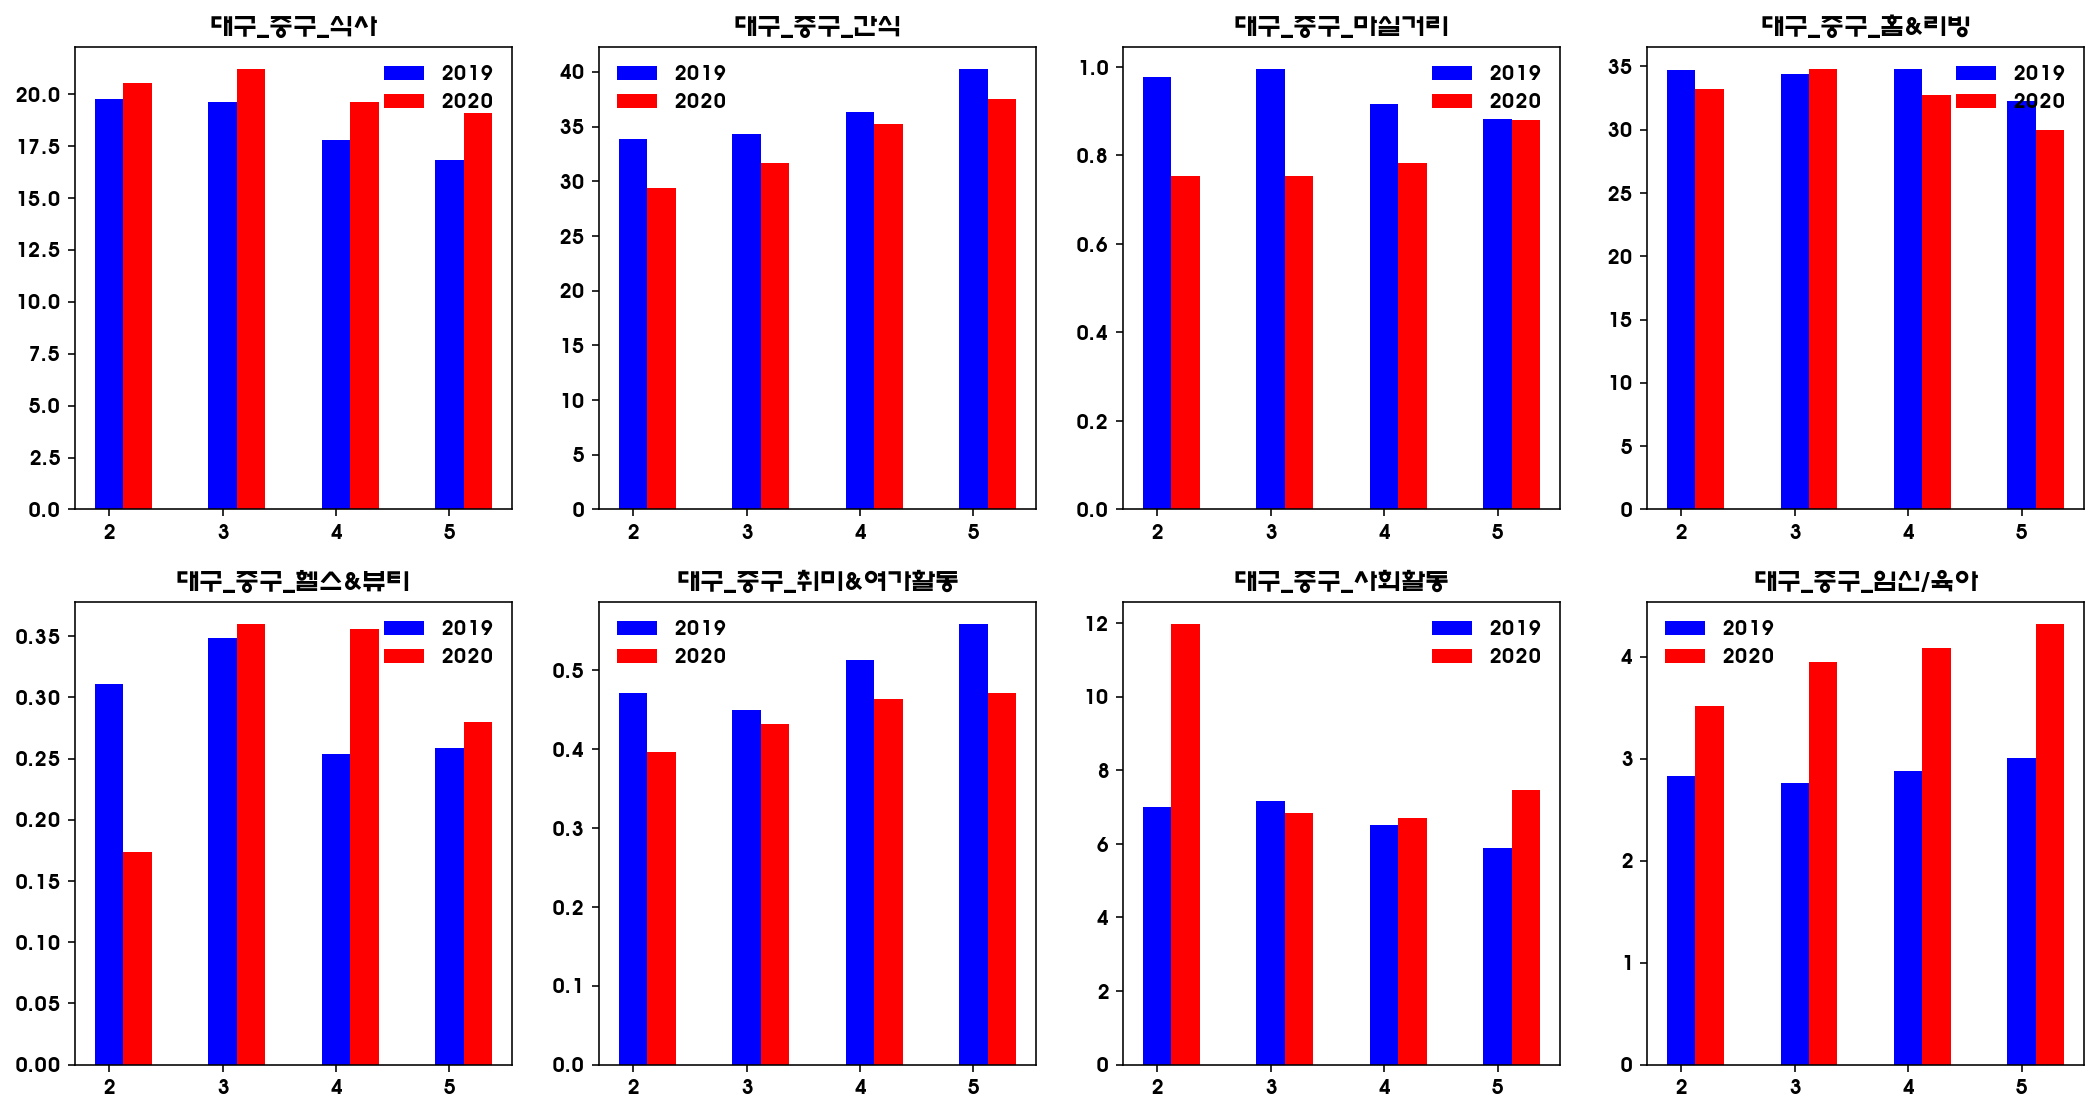

In [212]:
X = np.arange(4)
fig = plt.figure(figsize = (18,40))
for i in range(8,16):
    plt.subplot(8,4,i-7)
    plt.bar(X+2.00, list(data_2019T[data_2019T.columns[i]]), label='2019',color = 'b', width = 0.25)
    plt.bar(X+2.25, list(data_2020T[data_2020T.columns[i]]), label='2020',color = 'r', width = 0.25)
    plt.legend(loc="best",frameon=False)
    plt.title("대구_중구_"+value[i-8])
plt.show()

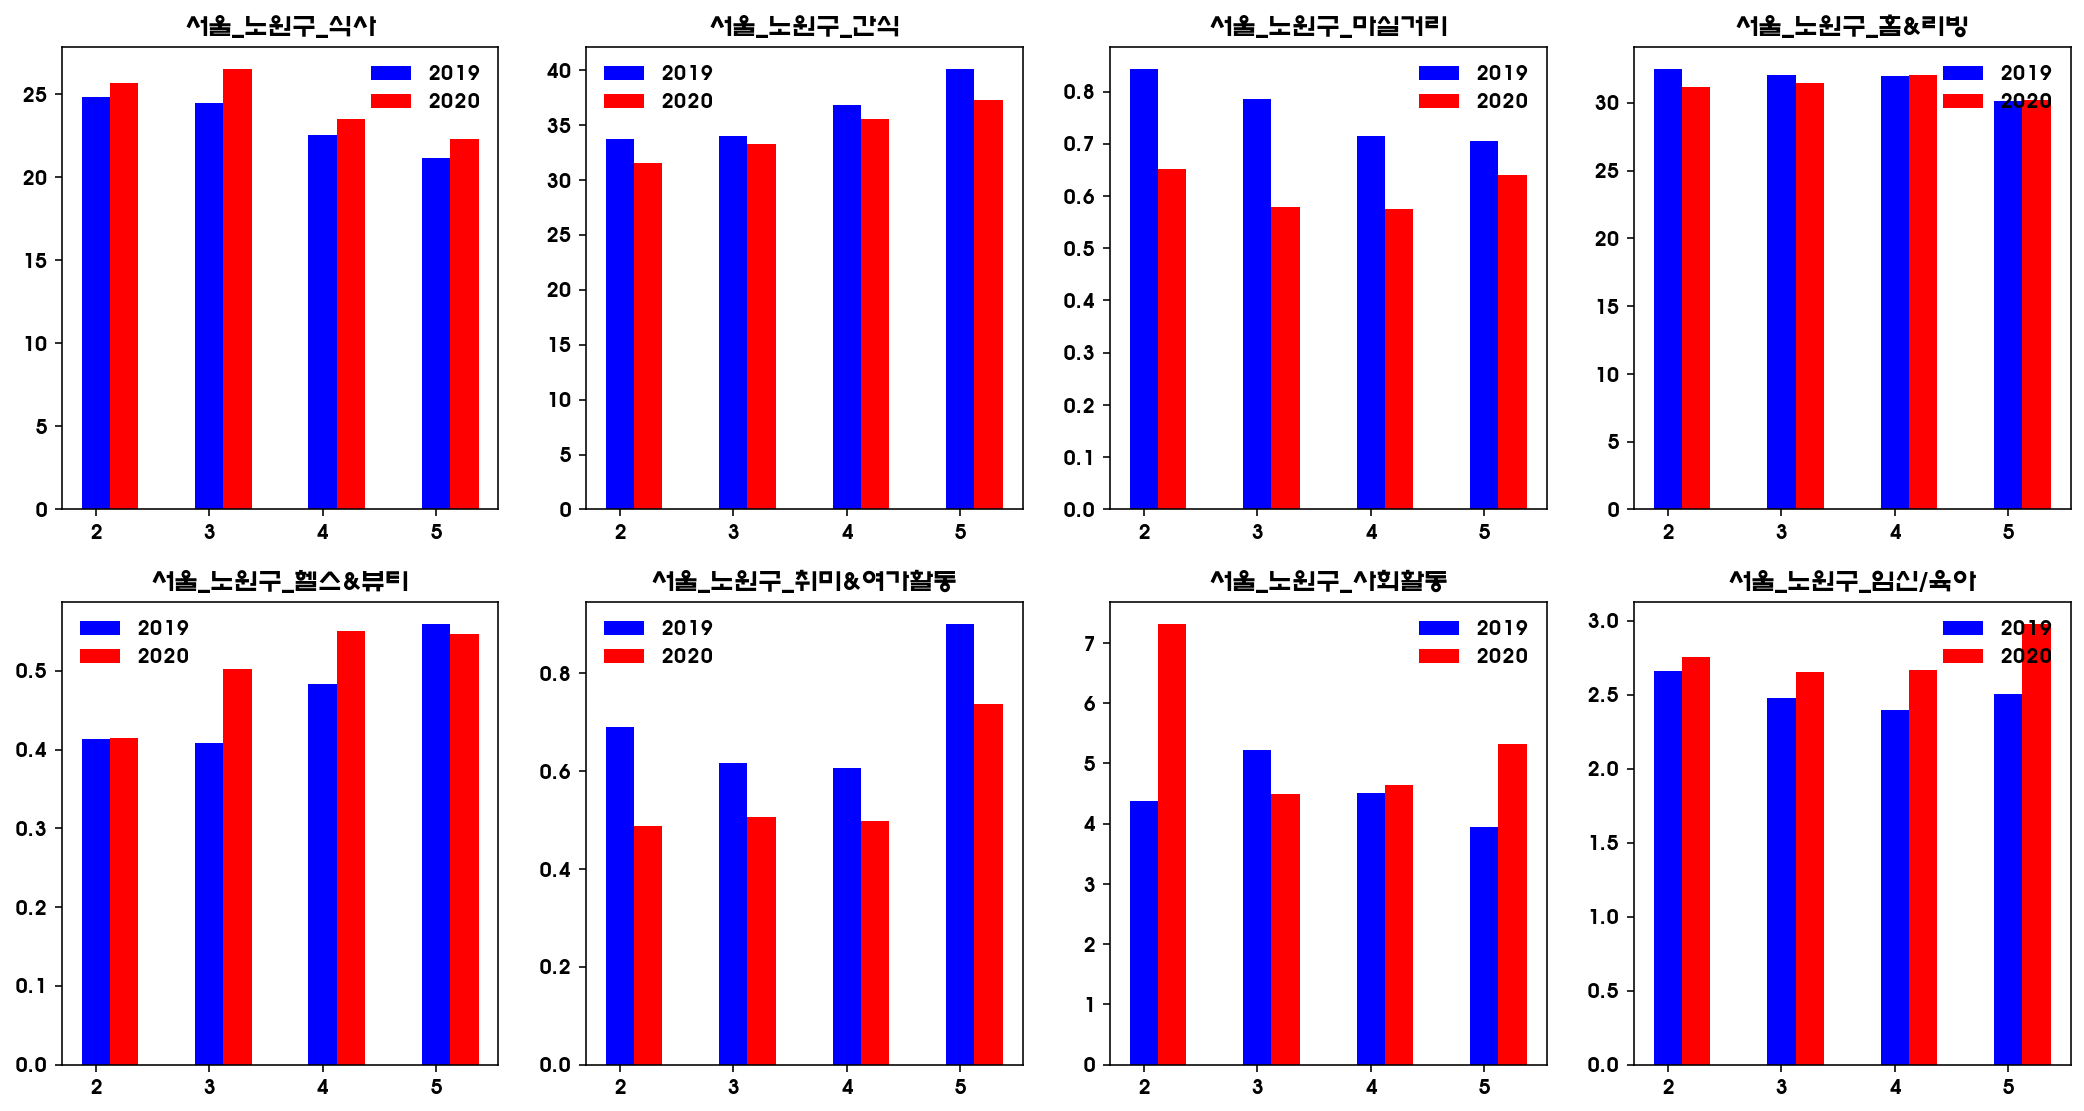

In [213]:
X = np.arange(4)
fig = plt.figure(figsize = (18,40))
for i in range(16,24):
    plt.subplot(8,4,i-15)
    plt.bar(X+2.00, list(data_2019T[data_2019T.columns[i]]), label='2019',color = 'b', width = 0.25)
    plt.bar(X+2.25, list(data_2020T[data_2020T.columns[i]]), label='2020',color = 'r', width = 0.25)
    plt.legend(loc="best",frameon=False)
    plt.title("서울_노원구_"+value[i-16])
plt.show()

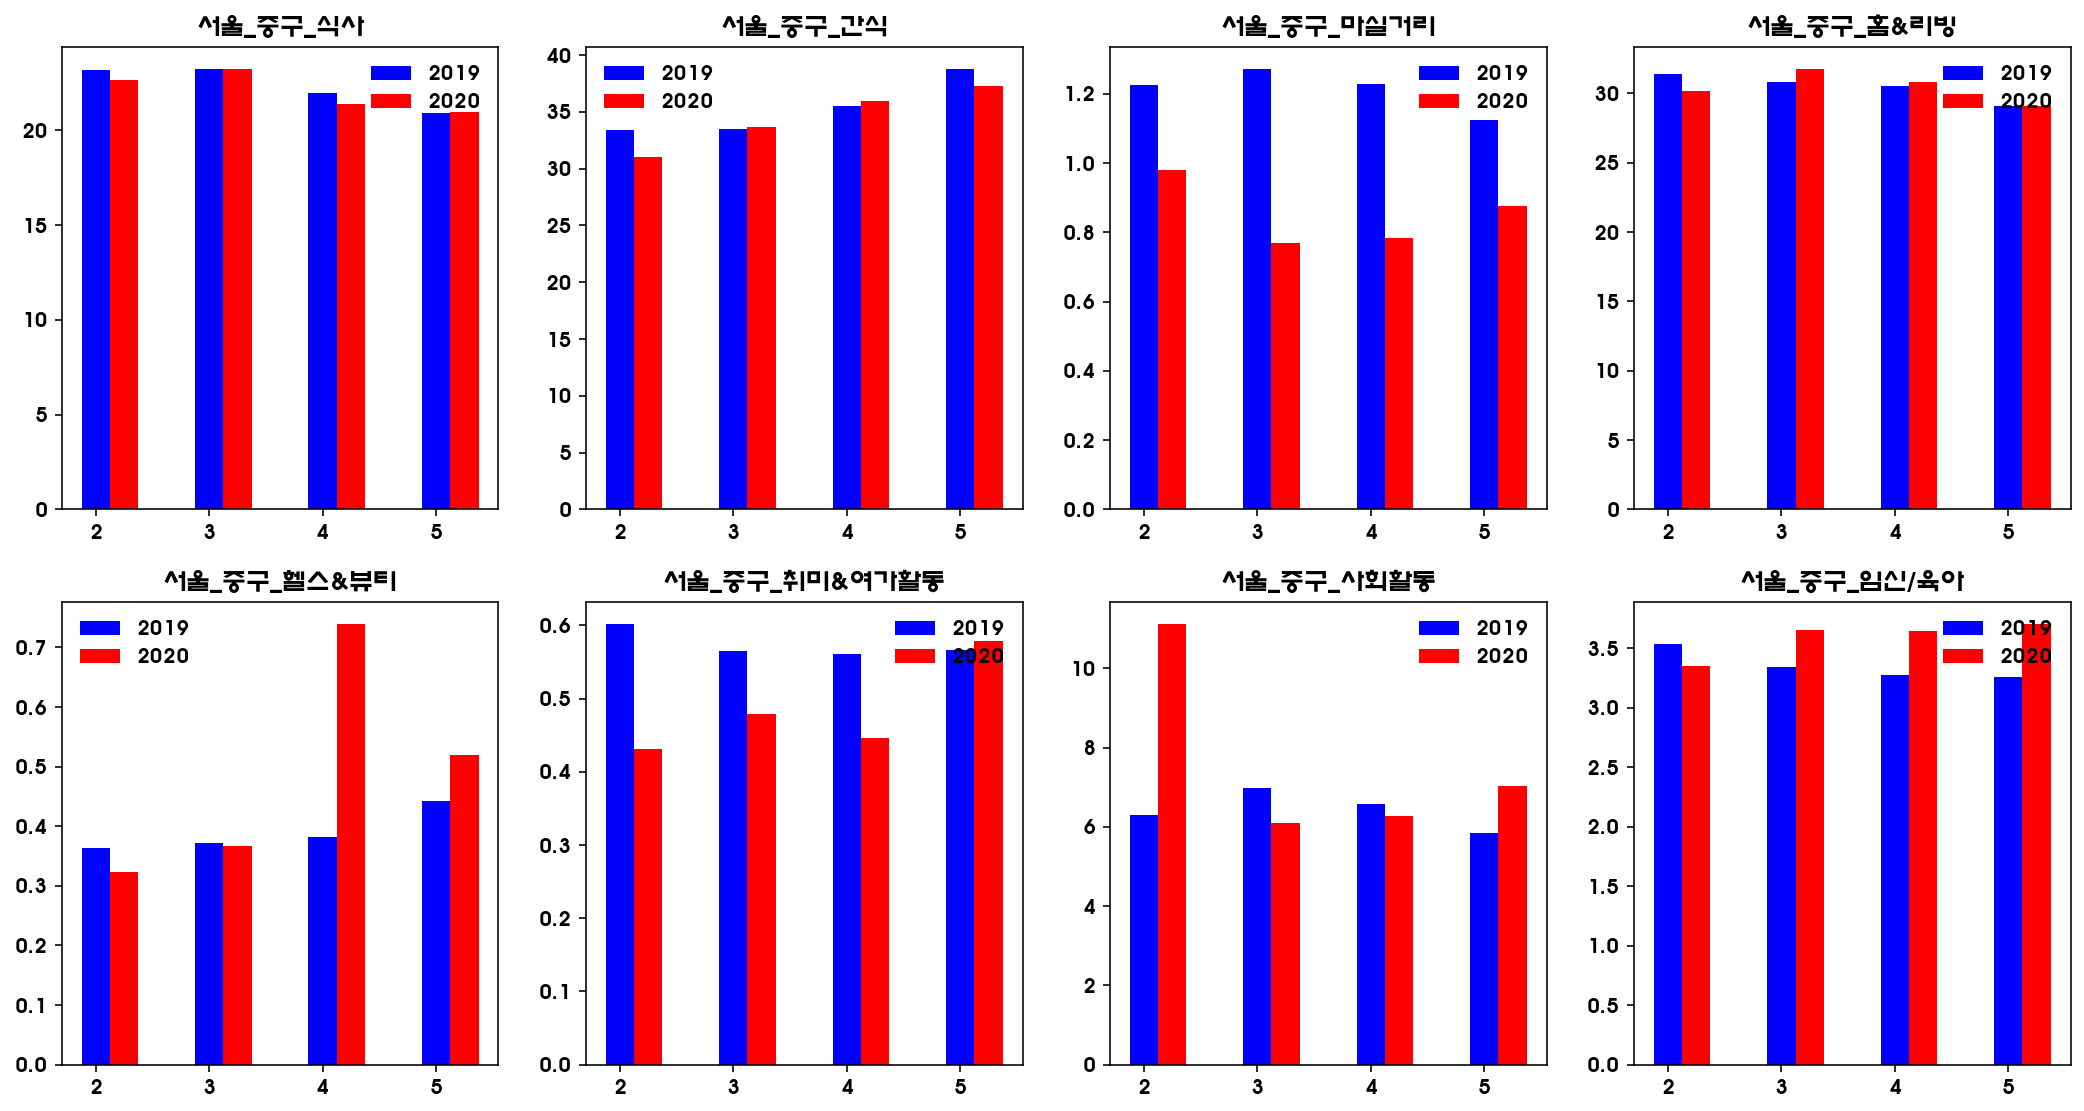

In [214]:
X = np.arange(4)
fig = plt.figure(figsize = (18,40))
for i in range(24,32):
    plt.subplot(8,4,i-23)
    plt.bar(X+2.00, list(data_2019T[data_2019T.columns[i]]), label='2019',color = 'b', width = 0.25)
    plt.bar(X+2.25, list(data_2020T[data_2020T.columns[i]]), label='2020',color = 'r', width = 0.25)
    plt.legend(loc="best",frameon=False)
    plt.title("서울_중구_"+value[i-24])
plt.show()